</h1></center><center><h1 style="font-size:350%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:40px;"> Unsupervised Learning: Movie Recommendation System
</h1></center>

</h1></center><center><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:5px;"> The Data Garage
</h1></center>

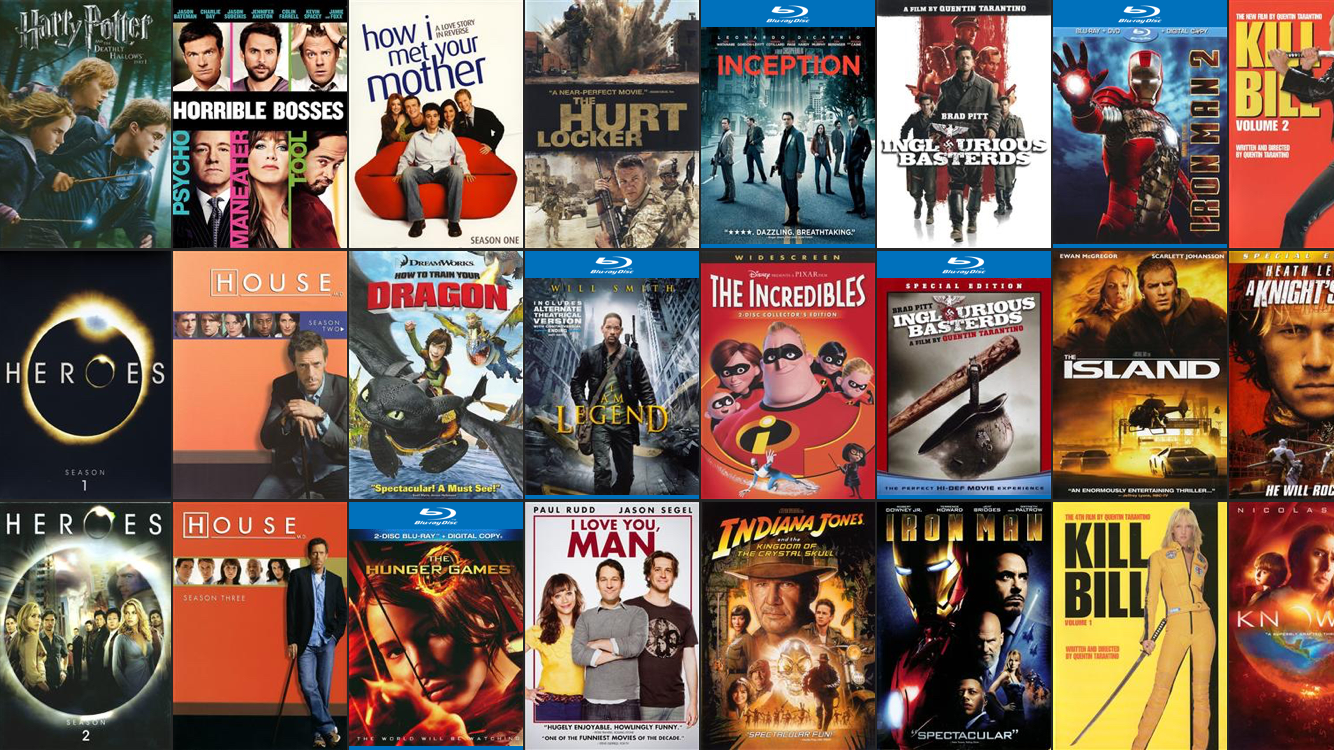

</h1></center><center><h1 style="font-size:250%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Created By
</h1></center>

</h1></center><center><h1 style="font-size:250%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Team JM2
</h1></center>

</h1></center><center><h1 style="font-size:250%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> Supervisor: Mr.John Mohale
</h1></center>

</h1></left><left><h1 style="font-size:225%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> TABLE OF CONTENTS
</h1></left>

<a id="cont"></a>


<a href=#one>1. Team Members</a>

<a href=#two>2. Predict Overview</a>

<a href=#three>3. Problem Statement</a>

<a href=#four>4. Initializing Commet Experiment</a>

<a href=#five>5. Package Imports csv Files</a>

<a href=#six>6. Loading CSV Files</a>

<a href=#seven>7. Exploratory Data Analysis (EDA)</a>

<a href=#eight>8. Modeling </a> 

<a href=#nine>9. Model Performance Metrics</a>

<a href=#ten>10. Kaggle Submission</a>

<a href=#eleven>10. Logging Commet Experiment</a>

<a href=#twelve>10. Refferences</a>

<a id="one"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> Team Members
</h1></left>
<a href=#cont>Back to Table of Contents</a>


---
 ### 1. Kelvin Mwaniki
 ### 2. Oludare Adenkunle
 ### 3. Thapelo Mofokeng
 ### 4. Marble M. Kusanele 
 ### 5. Jeff Ouma
---


<a id="two"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PREDICT OVERVIEW
</h1></left>
<a href=#cont>Back to Table of Contents</a>

<a id="three"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PROBLEM STATEMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

<a id="four"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> INITIALIZING COMET EXPERIMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [121]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="Lpfu75uOcVbBnxgwrSlgcau93",
    project_name="general",
    workspace="kev-m",
)
#Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET INFO: Experiment is live on comet.ml https://www.comet.com/kev-m/general/468561c332fc4fd492b8eecda99678e5

COMET INFO: Couldn't find a Git repository in 'C:\\Users\\USER\\Sprint # 7 Unsupervised Learning\\Predict' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WAR

<a id="five"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PACKAGE IMPORTS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [2]:
# Packages for data processing
import numpy as np
import pandas as pd
from datetime import datetime

# Packages for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

# Packages for modeling
import re
import os
import time
import heapq
from scipy.sparse import csr_matrix
from surprise import  accuracy,Dataset, Reader
from surprise.model_selection import cross_validate
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from surprise import BaselineOnly, NormalPredictor, SVD, SVDpp, NMF, SlopeOne, CoClustering, KNNWithMeans,KNNBasic

#scaling
import cufflinks as cf
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Packages for model evaluation
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Packages for saving models
import pickle

#Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

<a id="six"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> LOADING CSV FILES
</h1></left>
<a href=#cont>Back to Table of Contents</a>

Loading the required Datasets

In [3]:
df_train_set     = pd.read_csv('train.csv')
df_test_set      = pd.read_csv('test.csv')
df_genome_scores = pd.read_csv('genome_scores.csv')
df_genome_tags   = pd.read_csv('tags.csv')
df_imdb_data     = pd.read_csv('imdb_data.csv')
df_links         = pd.read_csv('links.csv')
df_movies        = pd.read_csv('movies.csv')
df_tags          = pd.read_csv('tags.csv')

In [4]:
df_test_set      = pd.read_csv('test.csv')

In [5]:
df_train_set1 = df_train_set.copy()

<a id="seven"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> EXPLORATORY DATA ANALYSIS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

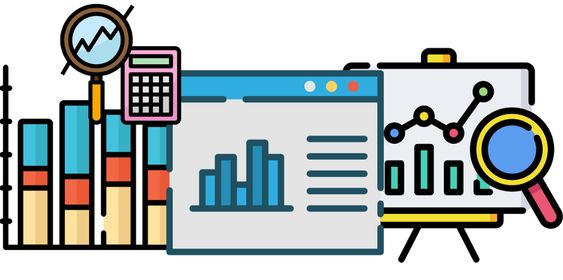

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> I SUMMARY STATISTICS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

This section involves carrying out summary statistics analysis

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> i> Train Dataset
</h1></left>

In [6]:
# This displays basic information and the shape of the dataset
df_train_set.info(), df_train_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


(None, (10000038, 4))

In [7]:
# This checks for null values in all features of the dataset 
df_train_set.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
# This code gives the statistical summary of the dataset
df_train_set['rating'].describe()

count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [9]:
# This code shows the first two entries of the dataset
df_train_set.head(2)

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739

##### Observations

It can be seen that the dataset contains mainly numeric data of the integer 64 and float 64 data types. The data is divided into four features with over 10M rows of data and no presence of null values. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;"> ii> Test Dataset
</h1></left>

In [10]:
# This displays basic information and the shape of the dataset
df_test_set.info(), df_test_set.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


(None, (5000019, 2))

In [11]:
# This checks for null values in all features of the dataset 
df_test_set.isnull().sum()

userId     0
movieId    0
dtype: int64

In [12]:
# This code shows the first two entries of the dataset
df_test_set.head(2)

userId  movieId
0       1     2011
1       1     4144

##### Observations

It can be seen that the dataset contains mainly numeric data of the int64  data type. The data is divided into two features with over 5M rows of data and no presence of null values. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">iii> Movie Table
</h1></left>

In [13]:
# This displays basic information and the shape of the dataset
df_movies.info(), df_movies.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


(None, (62423, 3))

In [14]:
# This checks for null values in all features of the dataset 
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [15]:
# This code gives the statistical summary of the dataset
df_movies[['genres','title']].describe()

genres            title
count   62423            62423
unique   1639            62325
top     Drama  The Void (2016)
freq     9056                2

In [16]:
# This code shows the first two entries of the dataset
df_movies.head(2)

movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy

##### Observations

It can be seen that the dataset contains numeric and alphanumeric data of the int64 and object data types. The data is divided into three features with over 62K rows of data and no presence of null values. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">iv>  IMDB Data
</h1></left>

In [17]:
# This displays basic information and the shape of the dataset
df_imdb_data.info(), df_imdb_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


(None, (27278, 6))

In [18]:
# This checks for null values in all features of the dataset 
df_imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [19]:
# This code gives the statistical summary of the dataset
df_imdb_data[['title_cast','director','plot_keywords','budget']].describe()

title_cast          director plot_keywords       budget
count        17210             17404         16200         7906
unique       17143             11786         16008         1362
top     Louis C.K.  See full summary   Documentary  $10,000,000
freq             5                28            19          232

In [20]:
# This code gives the statistical summary of the dataset
df_imdb_data[['runtime']].describe()

runtime
count  15189.000000
mean     100.312331
std       31.061707
min        1.000000
25%       89.000000
50%       98.000000
75%      109.000000
max      877.000000

In [21]:
# This code shows the first two entries of the dataset
df_imdb_data.head(2)

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   

             director  runtime       budget                     plot_keywords  
0       John Lasseter     81.0  $30,000,000  toy|rivalry|cowboy|cgi animation  
1  Jonathan Hensleigh    104.0  $65,000,000  board game|adventurer|fight|game

##### Observations

It can be seen that the dataset contains mainly numeric and alphanumeric data of the int64, float64 and object data types. The data is divided into six features with over 27K rows of data with null values in 5 of the six features. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">v> Genome Tags
</h1></left>

In [22]:
# This displays basic information and the shape of the dataset
df_genome_tags.info(), df_genome_tags.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


(None, (1093360, 4))

In [23]:
# This checks for null values in all features of the dataset 
df_genome_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [24]:
# This code gives the statistical summary of the dataset
df_genome_tags[['tag']].describe()

tag
count   1093344
unique    73050
top      sci-fi
freq       8330

In [25]:
# This code shows the first two entries of the dataset
df_genome_tags.head(2)

userId  movieId      tag   timestamp
0       3      260  classic  1439472355
1       3      260   sci-fi  1439472256

##### Observations

It can be seen that the dataset contains mainly numeric and alphanumeric data of the int64 and object data types. The data is divided into four features with over 1M rows of data and null values in one out of four features.

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">vi> Genome Scores
</h1></left>

In [26]:
# This displays basic information and the shape of the dataset
df_genome_scores.info(), df_genome_scores.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


(None, (15584448, 3))

In [27]:
# This checks for null values in all features of the dataset 
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [28]:
# This code gives the statistical summary of the dataset
df_genome_scores['relevance'].describe()

count    1.558445e+07
mean     1.163679e-01
std      1.544722e-01
min      2.500000e-04
25%      2.400000e-02
50%      5.650000e-02
75%      1.407500e-01
max      1.000000e+00
Name: relevance, dtype: float64

In [29]:
# This code shows the first two entries of the dataset
df_genome_scores.head(2)

movieId  tagId  relevance
0        1      1    0.02875
1        1      2    0.02375

##### Observations

It can be seen that the dataset contains mainly numeric data of the int64 and float64 data types. The data is divided into three features with over 15M rows of data and no presence of null values. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">vii> Tags Dataset
</h1></left>

In [30]:
# This displays basic information and the shape of the dataset
df_tags.info(), df_tags.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


(None, (1093360, 4))

In [31]:
# This checks for null values in all features of the dataset 
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [32]:
# This code gives the statistical summary of the dataset
df_tags[['tag']].describe()

tag
count   1093344
unique    73050
top      sci-fi
freq       8330

In [33]:
# This code shows the first two entries of the dataset
df_tags.head(2)

userId  movieId      tag   timestamp
0       3      260  classic  1439472355
1       3      260   sci-fi  1439472256

##### Observations

It can be seen that the dataset contains mainly numeric and alphanimeric data of the int64 and object data types. The data is divided into four features with over 1M rows of data and null values in one out of four features. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">viii> Links Dataset
</h1></left>

In [34]:
# This displays basic information and the shape of the dataset
df_links.info(), df_links.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


(None, (62423, 3))

In [35]:
# This checks for null values in all features of the dataset 
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [36]:
# This code gives the statistical summary of the dataset
df_links['movieId'].describe()

count     62423.000000
mean     122220.387646
std       63264.744844
min           1.000000
25%       82146.500000
50%      138022.000000
75%      173222.000000
max      209171.000000
Name: movieId, dtype: float64

In [37]:
# This code shows the first two entries of the dataset
df_links.head(2)

movieId  imdbId  tmdbId
0        1  114709   862.0
1        2  113497  8844.0

##### Observations

It can be seen that the dataset contains mainly numeric data of the int64 and float64 data types. The data is divided into three features with over 63K rows of data and null values in one out of three features. 

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> II UNI-VARIATE ANALYSIS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">i> Most Popular Movie Genres
</h1></left>

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

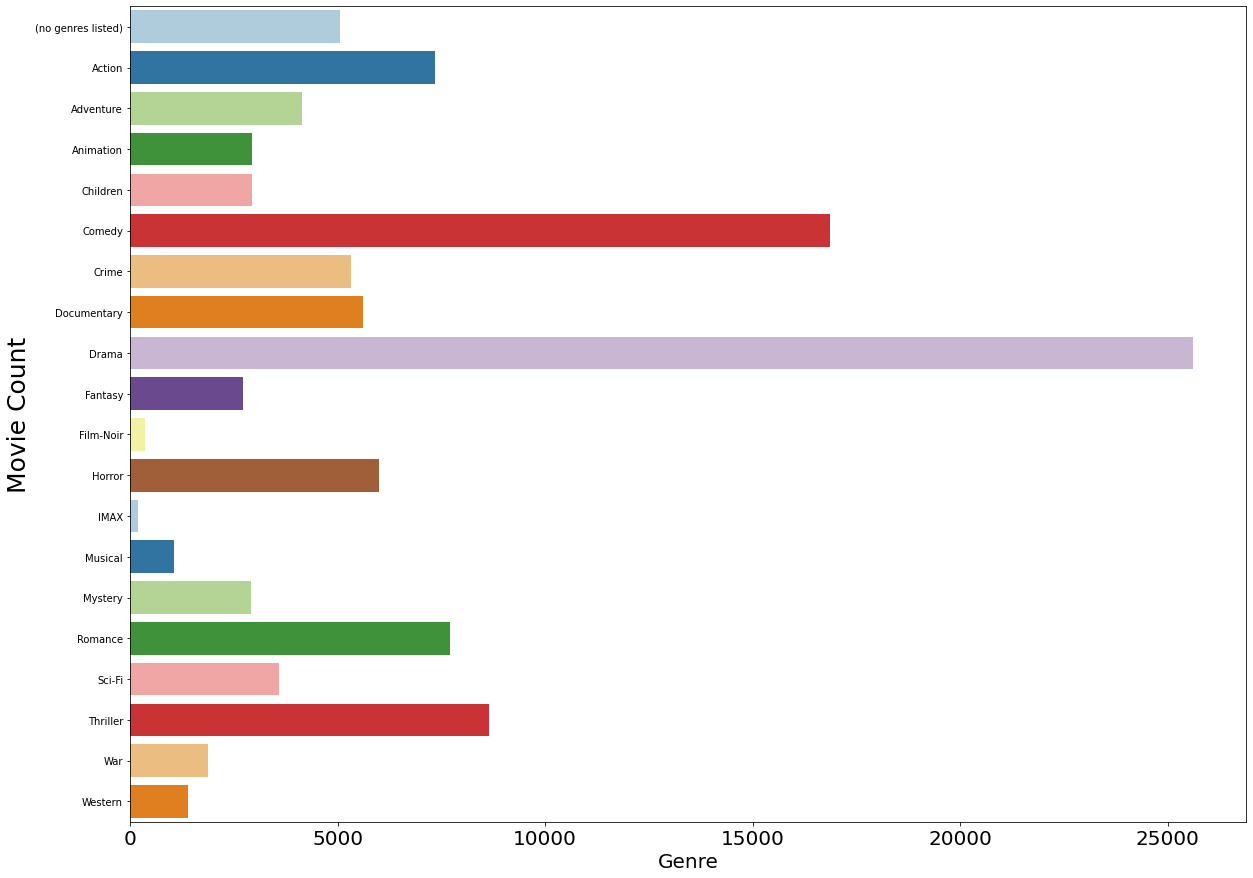

In [38]:
# Splitting the genres column along the '|' character and calculating the sum of movies per genre
movies_genres =df_movies['genres'].str.split('|',expand=True).stack().str.get_dummies().sum(level=0)

# Setting the graph size
fig, ax = plt.subplots(figsize=(20,15))

# Creating a dataframe that stores the sum of movies per genre in the column sum
k=pd.DataFrame(movies_genres.sum(),columns=['sum'])

# Plotting the data onto a horizontal barplot
sns.barplot(x= 'sum',y= k.index, data=k,orient='h', palette = 'Paired')

# Setting the X and Y axes labels and tick position as font size    
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Movie Count', fontsize = 25)
plt.xticks(rotation=0, fontsize = 20)

###### Observations

From above , it is visible that the most three popular movie genres are Drama, comedy and Thriller respectively with the least popullar genres being IMAX, Film-Noir, Musicals, Western and War movie genres.

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">ii> Average Movie Duration Distribution
</h1></left>

In [39]:
# Prints the average, max and min movie runtimes
print('The average movie runtime is : '+ str(round(df_imdb_data['runtime'].mean(),3)) + ' minutes')
print('The longest movie runtime is : '+ str(df_imdb_data['runtime'].min())  + ' minute')
print('The shortest movie runtim is : '+ str(df_imdb_data['runtime'].max())  + ' minutes')

The average movie runtime is : 100.312 minutes
The longest movie runtime is : 1.0 minute
The shortest movie runtim is : 877.0 minutes


<AxesSubplot:title={'center':'Histogram of Movie Runtime'}, xlabel='Runtime', ylabel='Count'>

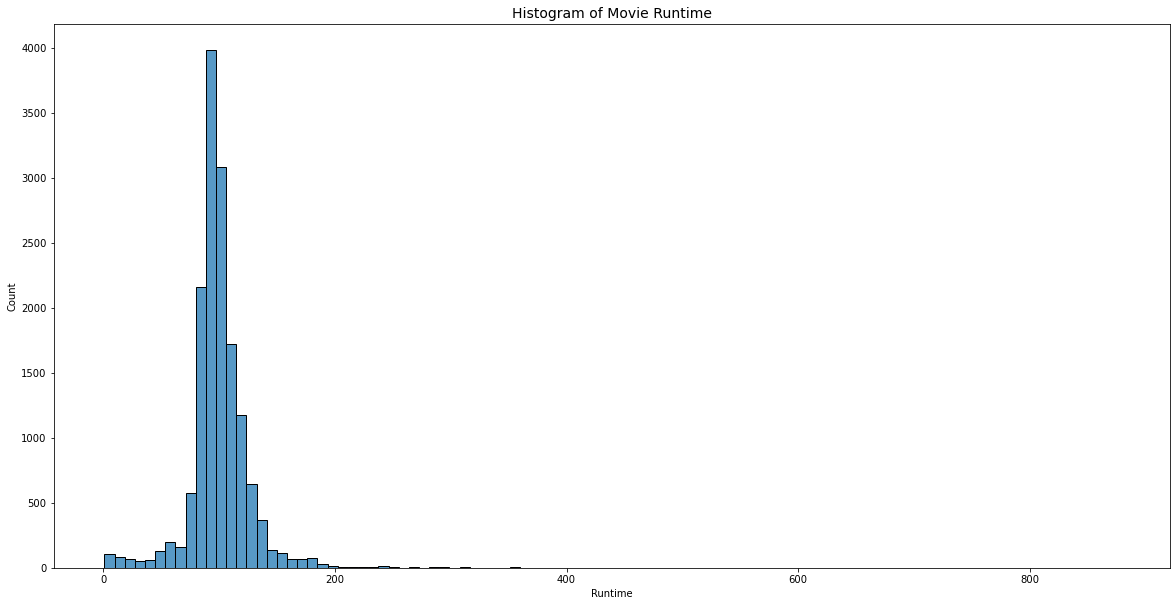

In [40]:
# Sets the plot size, title, x and y labels  
plt.figure(figsize=(20,10))
plt.title(f'Histogram of Movie Runtime', fontsize=14)
plt.xlabel('Runtime')
plt.ylabel('Count')

# Plots the histogram graph from the data
sns.histplot(df_imdb_data['runtime'], bins = 100)

###### Observation

we have alot of ouliers for the movie runtime. The mean runtime is the movies is approximately 100 minutes , we can see some movies had only 1minute runtime duration while other had more than 877 minutes. We can also see that a mojaroity of movies have a runtime of grater than 100 minutes. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">iii> Most Popular Movie Plot Key Words
</h1></left>

In [41]:
# Creating a dataframe storing the movieID and plot_keywords features seperately
movies_keyword = pd.DataFrame(df_imdb_data[['movieId', 'plot_keywords']],columns=['movieId', 'plot_keywords'])

# Split non-null plot_keyword feature records along the "|" character 
movies_keyword= movies_keyword[movies_keyword['plot_keywords'].notnull()]
movies_keyword.plot_keywords = movies_keyword.plot_keywords.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-play_plot combination is in a seperate row
movies_keyword = pd.DataFrame([(tup.movieId, d) for tup in movies_keyword.itertuples() for d in tup.plot_keywords],columns = ['movieId','plot_keywords'])
movies_keywords = movies_keyword.groupby(['plot_keywords'])['movieId'].count().reset_index(name = "count")
movies_keywords = movies_keywords.sort_values(by = 'count',ascending=False)
movies_keyword = movies_keywords.copy().head(25)

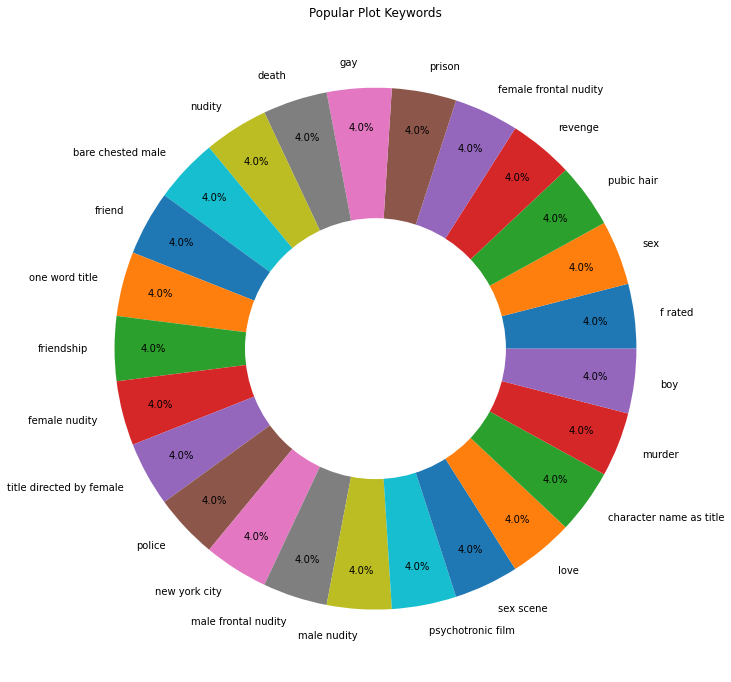

In [42]:
# Selecting popular movie plot_keywords 
movies_keyword.loc[movies_keyword['plot_keywords'].isin((movies_keyword['plot_keywords'].value_counts()[movies_keyword['plot_keywords'].value_counts() > 50]).index), 'content_rating'] = 'other'

# Assigning the plot_keywords values to variables x and y  
x = movies_keyword.plot_keywords.value_counts().index
y = movies_keyword.plot_keywords.value_counts().values

# Setting the plot figure size, 
plt.figure(figsize=(12,12))

# Charting the graph and setting doughnut parameters
plt.pie(y, labels=x,autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Setting the graph title
plt.title('Popular Plot Keywords')
plt.show()

###### Observation

We can observe that there is a wide range in variety for the top 25 most popular movie keywords. It can also be seen that most of the keywords revolve around human social and physical interaction as well as relationships. This decuces that movies protraying a deeper human connection are found to be more favourable by the audience.  

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> III MULTI-VARIATE ANALYSIS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">i> Movie Releases per Year
</h1></left>

In [43]:
# Extract the release year fron the movie titles
df_movies['release_year'] = df_movies.title.map(lambda x: re.findall('\d\d\d\d', x))
df_movies.release_year = df_movies.release_year.apply(lambda x: np.nan if not x else int(x[-1]))

# Generate pandas dataframe for the release_year feature and movie count as grouped by the release year
years =  pd.DataFrame(df_movies['release_year'], (df_movies.groupby(['release_year'])['title'].count()))

# Rename the columns for the years dataframe
years.rename(columns={'title':'movies released'}, inplace=True)

In [44]:
(df_movies['release_year'] == 1013).value_counts()

False    62422
True         1
Name: release_year, dtype: int64

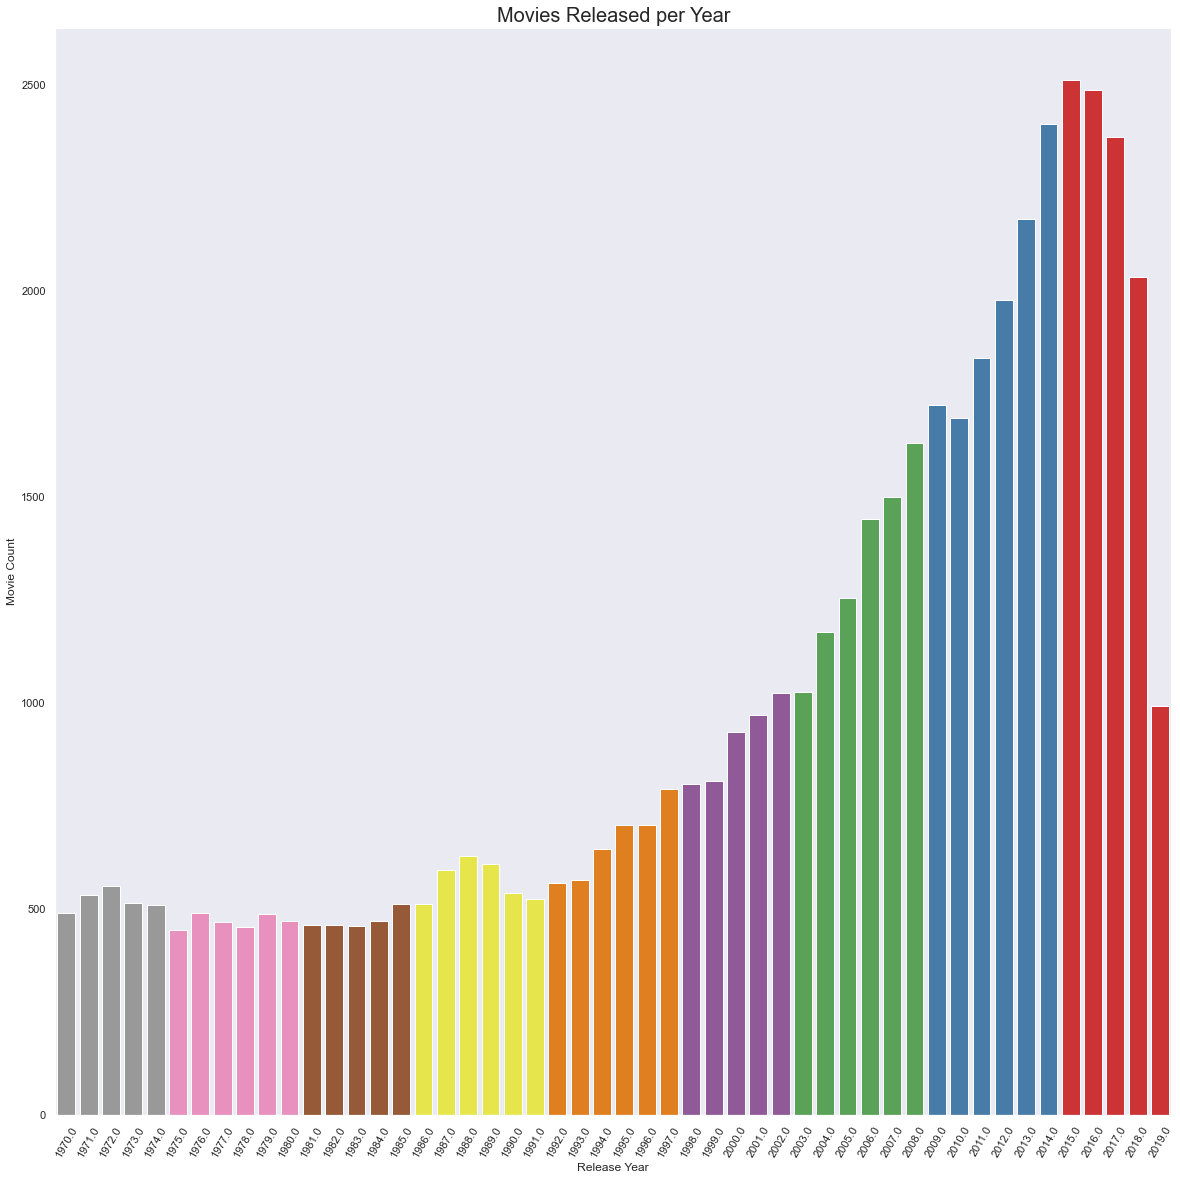

In [120]:
# Filtering for movies with release years after 1960
df_movies = df_movies[df_movies['release_year'] >= 1960 ]

# Set the graph figure size and plot style 
plt.figure(figsize=(20,20))
sns.set(style='dark')

# Generate the countplot for 
sns.countplot(df_movies['release_year'], palette = 'Set1_r')
plt.title('Movies Released per Year', fontsize = 20)
plt.xlabel('Release Year', fontsize = 12)
plt.ylabel('Movie Count', fontsize = 12)
plt.xticks(rotation = 60)
plt.show()


###### Observations

Most movies were released in the year 2015

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">ii> Movie Releases per Director
</h1></left>

In [46]:
'''
This function gets the count of directors within the dataset and 
gets the count of movies made per director then
sorts and returns the name of the directors 
'''

def count_directors(df, count = 10):
    # Create a dataframe called directors for director value counts and rest the index values
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    
    # Search for director record with value = 'See full summary'
    index2_names = directors[directors['director']=='See full summary'].index
    
    # Delete the record with the given value
    directors.drop(index2_names, inplace = True)
    
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 9874 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [47]:
'''
This function generates a bar graph using the value counts values 
and categorical feature of a given dataset
'''

def feature_count(df, column):
    # Set grpah size
    plt.figure(figsize=(20,9))
    
    # Set graph style 
    sns.set(style="whitegrid")
    
    # Plot the graph
    ax = sns.barplot(x =df['count'] , y= df[f'{column}'], palette='Spectral')
    
    # Set the graph title, x and y axis labels
    plt.title(f'Popular Movie Directors', fontsize=14)
    plt.xlabel('Movie Count')
    plt.ylabel('Director')
    
    # Plot the graph
    plt.show()
    

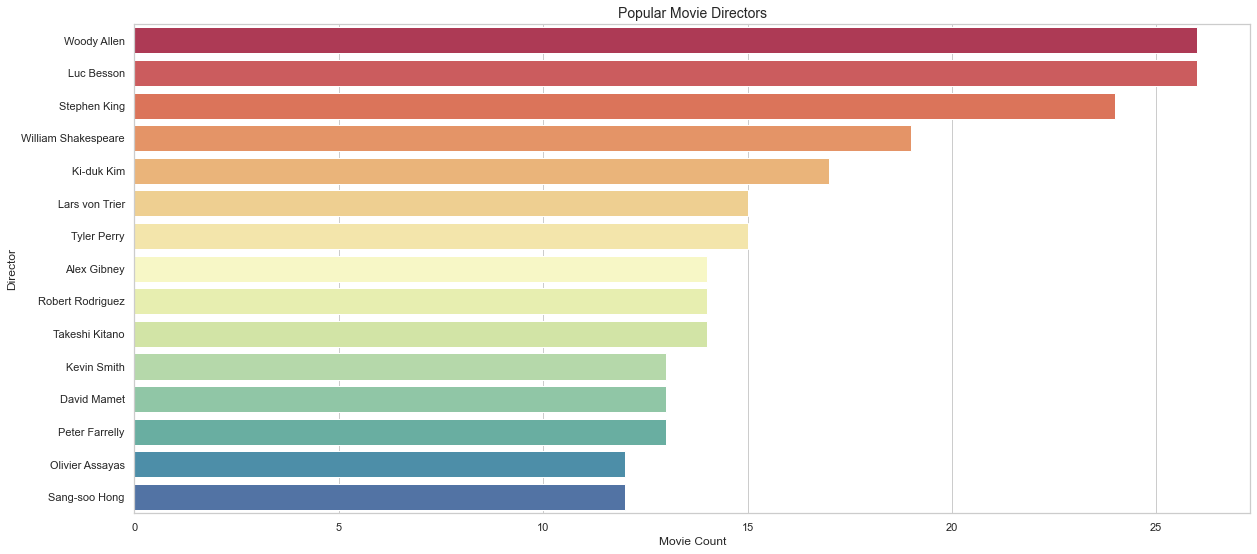

In [48]:
# Calling the above functions for the IMDB and directors datasets
directors = count_directors(df_imdb_data)
feature_count(directors.head(15), 'director') # 15 top directors

###### Observations

From the abouve plot we can see that Woody Allen, Luc Besson and Stephen King are the most popular directors by movie count while Sang-soo Hong, Oliver Assayas and Peter Farrelly are the least popular directors by movie count. This can be attributed to years of experience within the field of movie production as well as availability of resources and access to world class talent within the given region of production.

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">iii> Movie Budgets per Year
</h1></left>

In [49]:
# Merge the movies and IMDB datasets on the movieId feature
merged_inner = pd.merge(left=df_movies, right=df_imdb_data, left_on='movieId', right_on='movieId')

In [50]:
# Create new dataframe for the movieID, title and budegt features
movies_budget = pd.DataFrame(merged_inner[['movieId', 'title','budget']],columns=['movieId', 'title','budget'])

# Removing any null values in the dataframe
movies_budget= movies_budget[movies_budget['title'].notnull()]

# Replacing null values in the budget feature with NAN
movies_budget['budget'].replace('', np.nan, inplace=True)

# Droping any persistant null values still present in the budget feature of the dataframe
movies_budget.dropna(subset=['budget'], inplace=True)

# Split title seperated by "|" and create a list containing the title allocated to each movie
movies_budget.title = movies_budget.title.apply(lambda x: int(re.findall(r"\d\d\d\d",x).pop(0)))
movies_budget.budget = movies_budget.budget.apply(lambda x: int(re.sub("[^0-9]", "", x)) if str(x)[:1] =='$' else None)
movies_budget = movies_budget[movies_budget['budget'].notnull()]

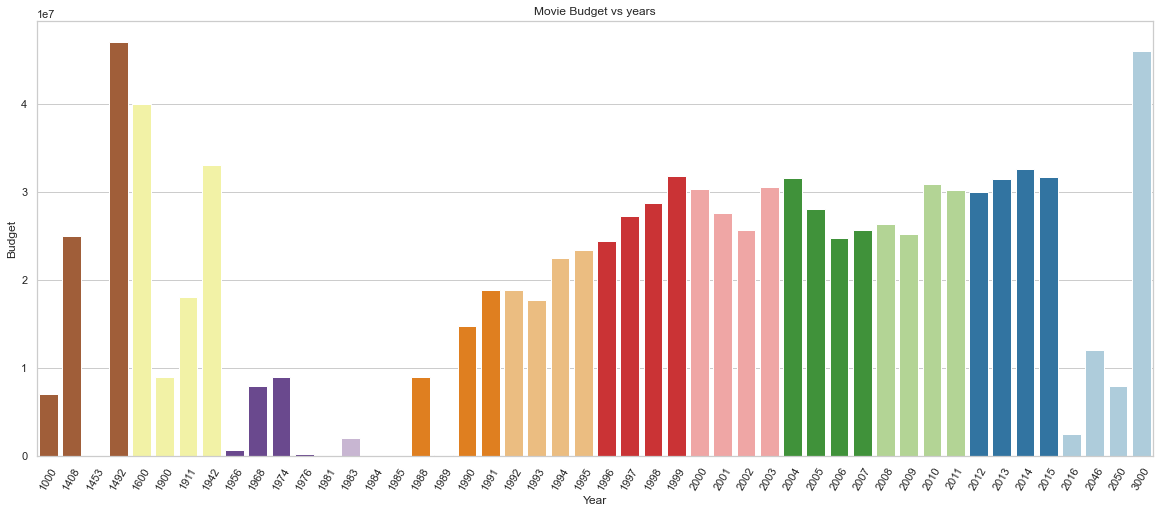

In [51]:
# Set the graph size
plt.figure(figsize=(20,8))

# Set the graph title
plt.title('Movie Budget vs years')

# Plotting the bar plot graph 
sns.barplot(x = movies_budget.title, y=movies_budget.budget, ci = None, palette = 'Paired_r')

# Setting the x, y axes labels as well as xtick position
plt.xlabel('Year')
plt.ylabel('Budget')
plt.xticks(rotation=60)
plt.show()

###### Observations

Removing NaN values in Columns and replacing them with the mode of the column in case of Categorical Values and with column mean in case of numnerical values

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">iv> User Count per Rating Value
</h1></left>

In [ ]:
# Genarating a pandas dataframe to store the ratings feature value counts
movieRating_Group = df_train_set['rating'].value_counts().sort_index().reset_index()

# Plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(data = movieRating_Group, x='index', y='rating', color = "red", palette = 'RdYlGn_r')

# Setting the x, y axis labels as well as graph title 
plt.xlabel("Rating")
plt.ylabel('Number of Users')
plt.title('Number of Users Per Rating', fontsize=14)

# Displaying the graph
plt.show()

###### Observations

It can be observed that a majority of ratings are for movies that scored 3.0 and above while significantly fewer movies were rated below 3.0. This indicates a user bias in the willingness to rate movies enjoyed and unewillingness to rate movies not enjoyed. It also indicates that user bias in rating movies enjoyed with a 4.0 as opposed to a 5.0 so as to allow for growth in user expectations while using the movie recommendation service. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">v> Popular Movie Cast Names
</h1></left>

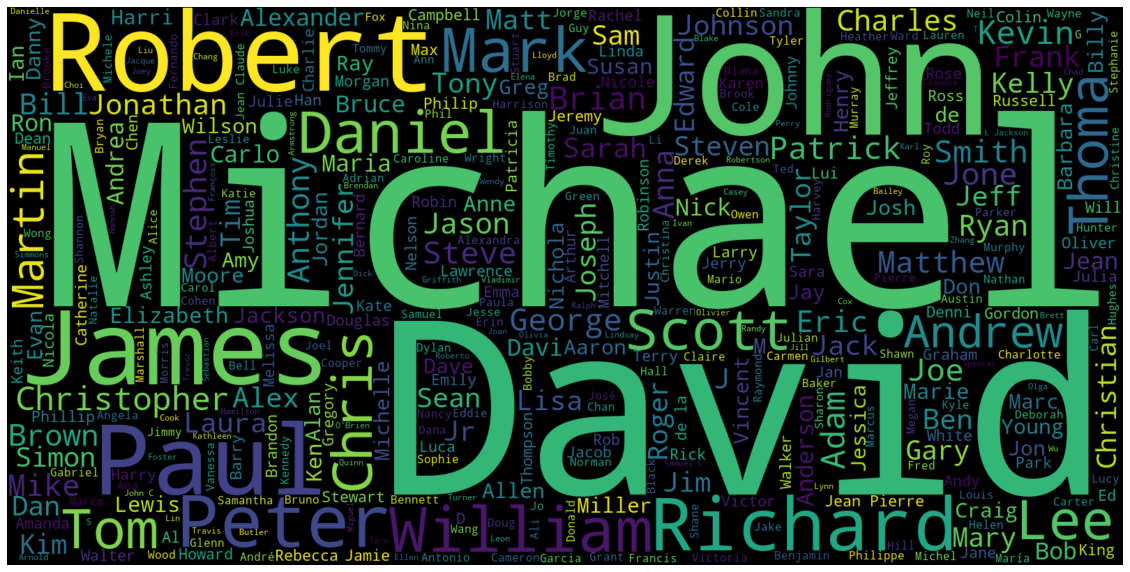

In [53]:
# Create series feature from the title cast feature
gen2 = df_imdb_data['title_cast'].explode()

# Convert series object to a list object
text = list(set(gen2))

# Sets the chart size and initializes the wordcloud values to the wordcloud variable
plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud( max_words = 400 , width = 1600 , height = 800,random_state = 31).generate(str(text))

# Plot the wordcloud chart
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

###### Observations

From the word cloud above it can be seen that a few names feature significantly more as compared to others. This can be attributed to the level of skill and experience in the industry as well as the popullarity of movies or movie series stared in by the erspective cast member. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">vi> Popular Movie Genres
</h1></left>

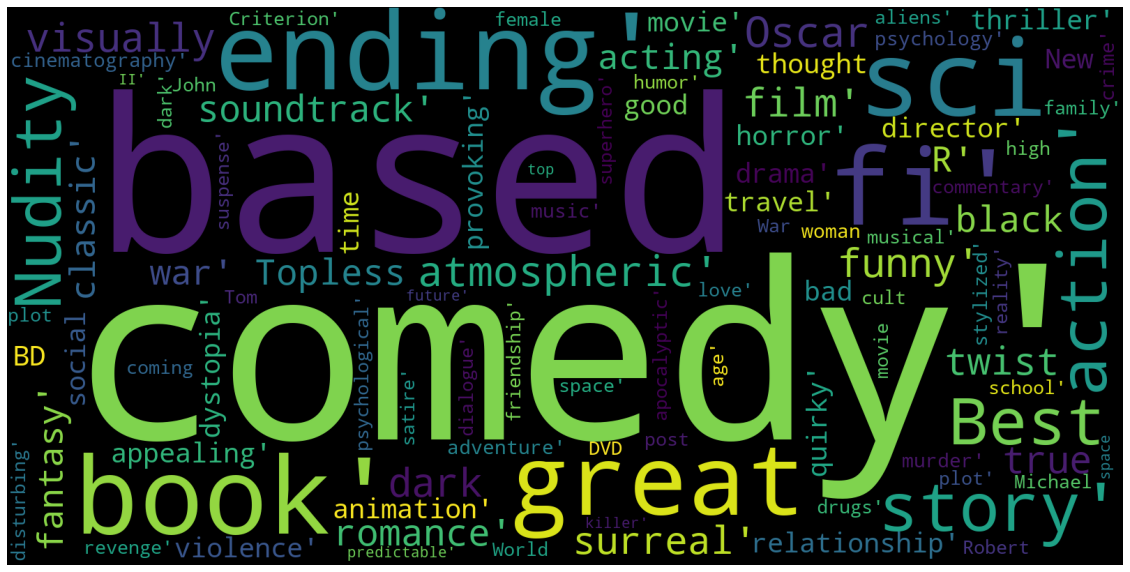

In [54]:
# Creates string object from the tags feature
tags_movies =str(list(df_tags['tag']))

# Sets the graph size and initializes the wordcloud values to the variable wordcloud
plt.figure(figsize = (20,20))
wordcloud = WordCloud(max_words = 100 , width = 1600 , height = 800,collocations=False).generate(tags_movies)

# Plots the wordcloud chart
plt.axis("off")
plt.imshow(wordcloud)

###### Observations 

From the word cloud above, we can see that the most popular tags are Comedy, book, based and ending. This indicates that the users are interested in movies within the comdey genre, movies base on books or real life stories and movies with a climactic or suspenseful ending. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">vii> Numerical Features Correlation Heatmap
</h1></left>

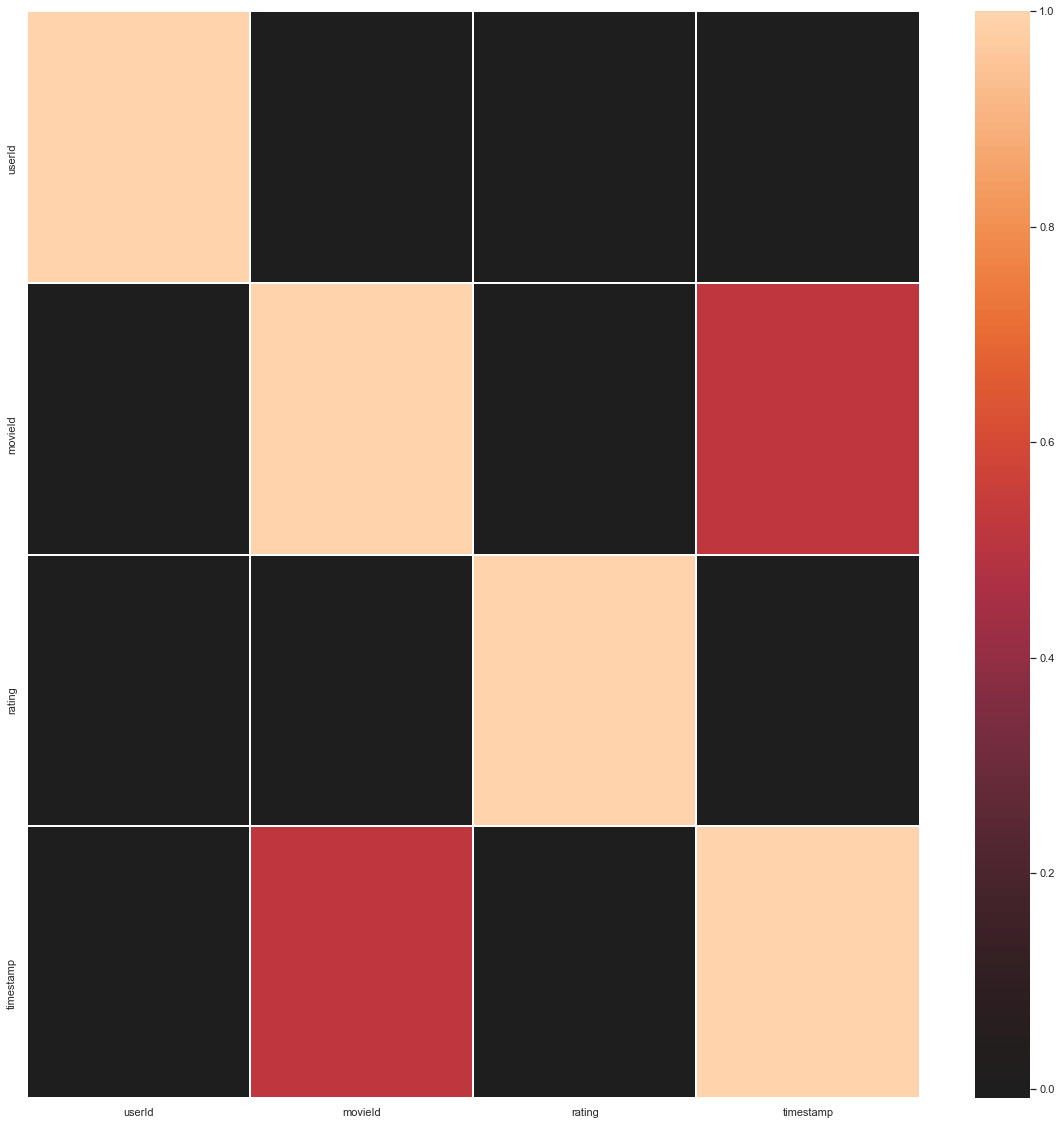

<Figure size 864x864 with 0 Axes>

In [55]:
# Generate train dataset feature correlation values
cor = df_train_set.corr()

# Plot the train dataset feature correlation heatmap
sns.heatmap(cor,linewidths=1, center=0)
plt.figure(figsize=(12,12)) # Set the heatmap size
plt.show()

###### Observations

We can see that most features are not correlated appart from the rating_year and the movieId features. This is due to the release date of a movie affecting the rating date of the same.

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">viii> Ratings Count by Year
</h1></left>

In [56]:
# Convert timestamp to year column representing the year the rating was made on merged dataframe
df_train_set['rating_year'] = df_train_set['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).year)
df_train_set.drop('timestamp', axis=1, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019')])

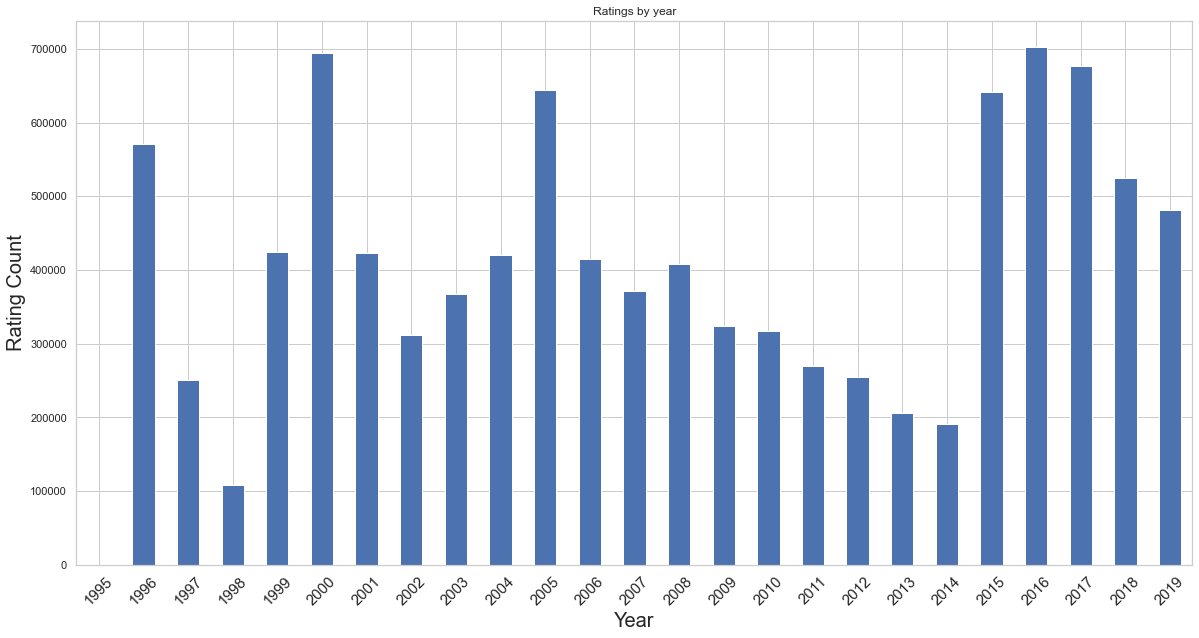

In [57]:
# Set the graph size
plt.figure(figsize=(20,10))

# Generate the graph
df_train_set.groupby('rating_year')['rating'].count().plot(kind='bar', title='Ratings by year')
fig.tight_layout()

# Set the x,y axis labes and xticks fontsize, text output, position and 
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Rating Count', fontsize = 20)
plt.xticks(rotation=45, fontsize = 15)

###### Observations

The ratings for the movies span a period of 25 years, from 1995 all the way to 2019, with the last 5 years accumalatively having had the most ratings in comparison to any othe other 5 year interval. From 2006 to 2014 there is decline in user engagement when it comes to rating movies. Prior to 2006 there are 3 good years with ratings above 500000 ratings for the year, 3 more years at 400000 ratings and 3 below 300000 ratings for the year. it would be of interest to the spending behaviour of users for each of these years, as that would tell the complete story.

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">ix> Average and Total Ratings Count by Number of Genres per Movie
</h1></left>

In [58]:
# Assign the decade values to a variable decades
decades = [(1870, 1879), (1880, 1889), (1990, 1909), (1910, 1919), (1920, 1929),
           (1930, 1939), (1940, 1949), (1950, 1959), (1960, 1969), (1970, 1979),
           (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2019), (9999, 10000)]

# Create list of decade categories
decade_categories = ['1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940',
           '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'Unspecified']

In [59]:
'''
This function generates the release date for movies by
stripping the numerical values from movie titles and
assigning them to a variable year
'''
def get_release_dates(title):
    
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

In [60]:

'''
This function gets the range of years and checks if the 
values are also reflected in the year function 
as a reult of stripping the year value from the title column
'''
def get_releases_by_year(df, release_years):
    
    mask = df[(df['release_year'] >= release_years[0]) & (df['release_year'] <= release_years[-1])]
    return [mask[mask['release_year'] == year]['movieId'].nunique() for year in release_years]

In [61]:
'''
This function the rating values according to the year of movie release
'''
def count_ratings_by_years(df, start, end):
    
    ratings_count = [0] * 10
    ratings = np.linspace(0.5, 5.0, 10)
    for year in range(start, end + 1):
        df_year = df[df['rating_year'] == year]
        count = 0
        for rating in ratings:
            ratings_count[count] += (df_year[df_year['rating'] == rating]['movieId'].count())
            count += 1
    return ratings_count

In [62]:
'''
This function gets the genre count for movies by
splitting the genres feature along the '|' character
'''
def get_genre_count(number_of_genres, movie_genres, df):
    
    genre_count = [0] * len(movie_genres)
    for index, genres in df[df['genre_count'] == number_of_genres]['genres'].items():
        for genre in genres.split('|'):
            genre_count[movie_genres.index(genre)] += 1
            
    return genre_count


In [63]:
'''
This function gets the decade within which a
movie was released
'''
def movie_rating_decade_released(start_year, end_year, decades, df):
    
    ratings_count = []
    ratings_average = []
    
    for start, end in decades:
        mask_1 = (df['release_year'] >= start) & (df['release_year'] <= end)
        mask_2 = (df['rating_year'] >= start_year) & (df['rating_year'] <= end_year)
        sub_df = df[mask_1 & mask_2]['rating']
        ratings_count.append(sub_df.count())
        ratings_average.append(np.round(sub_df.mean(), 2))
    
    return ratings_count, ratings_average

In [64]:
'''
This function gets the userId values for movies 
within a given year period/range
'''
def get_user_ids(year, user_ids, df):
    
    users = []
    for user_id in user_ids:
        if df[df['userId'] == user_id]['rating_year'].max() <= year:
            users.append(user_id)
    
    return users

In [65]:
# Merging the train and movies data on the movieId column
df_train_set = df_train_set.merge(df_movies, on='movieId')

In [66]:
# Creating a genre count column, for the number of genres a movie belongs to
df_train_set['genre_count'] = df_train_set['genres'].apply(lambda genres: len(genres.split('|')))

In [67]:
# Creating a list of all the genres 
df_movie_genres = []
df_train_set['genres'].apply(lambda genres: df_movie_genres.extend(genres.split('|')))
df_movie_genres = sorted(set(df_movie_genres))

In [68]:
# Getting minimum and maximum number of genres for movies
df_train_set['genre_count'].min(), df_train_set['genre_count'].max()

(1, 10)

In [72]:
# count:  number of movies released in each decade
# average: average rating for the movies in each decade
count, average = movie_rating_decade_released(1995, 2019, decades, df_train_set)
decades_df = pd.DataFrame(list(zip(decade_categories, count, average)), columns=['decade', 'ratings_count', 'ratings_average']).fillna(0)

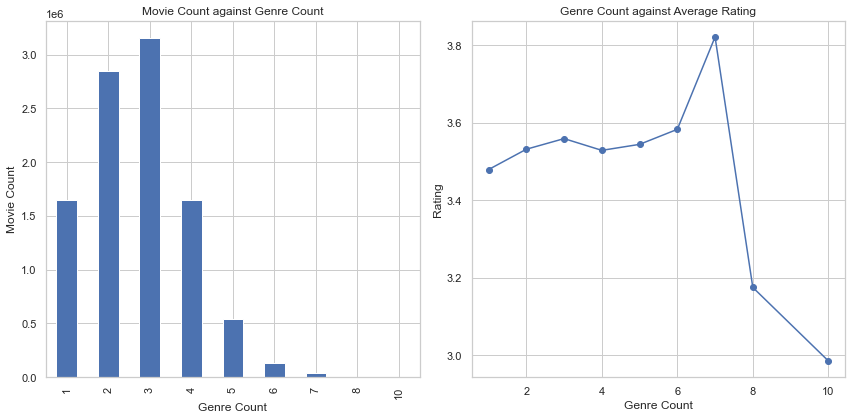

In [70]:
# Generate graph plots using a subplot configuration
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax1 = df_train_set.groupby('genre_count')['rating'].count().plot(kind='bar', title='Movie Count against Genre Count',ylabel = 'Movie Count', xlabel = 'Genre Count', ax=ax[0])
ax2 = df_train_set.groupby('genre_count')['rating'].mean().plot(kind='line', marker='o', title='Genre Count against Average Rating',ylabel = 'Rating', xlabel = 'Genre Count', ax=ax[1])
fig.tight_layout()

##### Observations

Movies with between 1 to 4 genres have the most number of ratings for the 25 years, with an average rating for these of roughly bewteen 3.5 to 3.6. Movies with 2 and 3 genres movies get the lions share of the ratings. It can also be seen that movies that fall into multiple genres get higher rating peaking at a genre count of 6 after which movie ratings decrease significntly. 

</h1></left><left><h1 style="font-size:120%; font-family:cursive; background:white; color:black; border-radius:10px 10px; padding:10px;">x> Average and Total Ratings Count by Decade of Movie release
</h1></left>

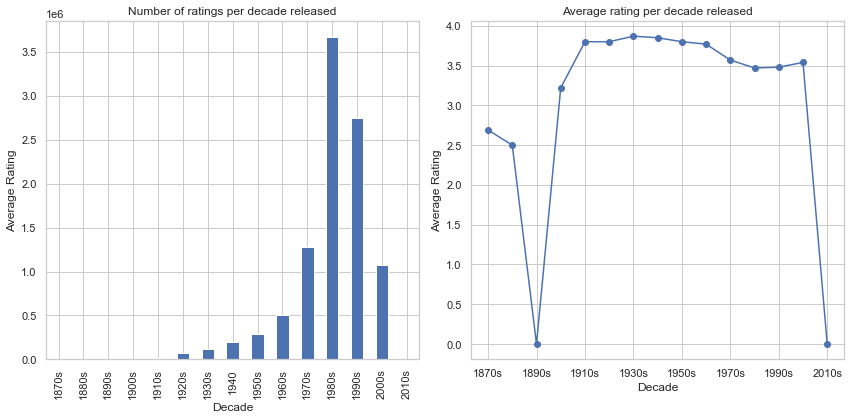

In [71]:
# Generate graph plots using a subplot configuration
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
ax1 = decades_df.groupby('decade')['ratings_count'].sum().plot(kind='bar', title='Number of ratings per decade released',ylabel = 'Average Rating' , xlabel = 'Decade', ax=ax[0])
ax2 = decades_df.groupby('decade')['ratings_average'].sum().plot(kind='line', marker='o', title='Average rating per decade released', ylabel = 'Average Rating', xlabel = 'Decade', ax=ax[1])
fig.tight_layout()

##### Observations

This is an interesting insight in the data with potentially huge implications, that will be eloborated upon later, in the conclusion when recommendations are put forward. For now however what emerges is the following; movies from before the 1970s have little to no ratings associated with them. Movies released from 1980s have the most ratings. The average rating for movies released for each decade from 1910 onwards is between 3.5 and 4.0., with that average for movies released in later decades carries more weight, since they have more ratings. With movies released in earlier decades having a lower average, perhaps to do with the quality of the movies.

However, if the 25 year ratings period is divided into 5, 5 year intervals, does this pattern hold, lets find out.

<a id="eight"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> MODEL DEVELOPMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

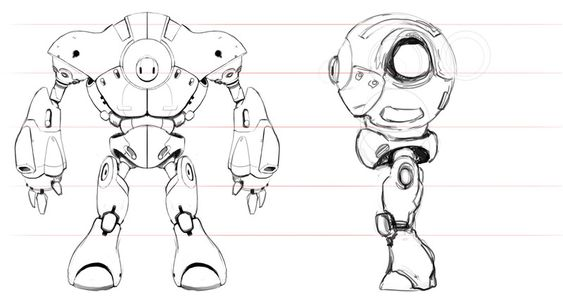

</h1></left><left><h1 style="font-size:150%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> PRE-PROCESSING
</h1></left> 
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# Merging the Movies and the train data sets on the MovieId column
m_train_movies = pd.merge(df_train_set1, df_movies, on = 'movieId', how = 'inner')

In [76]:
# Convert timestamp to year column representing the year the rating was made on merged dataframe
m_train_movies['rating_year'] = m_train_movies['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).year)
m_train_movies.drop('timestamp', axis=1, inplace=True)

In [78]:
# Creating the release year by extracting the release year from the movie title
m_train_movies['release_year'] = m_train_movies['title'].apply(get_release_dates)

In [79]:
# Checking number of distinct years for movie releases, including the ealrliest and most recent year
m_train_movies['release_year'].nunique(), m_train_movies['release_year'].min(), m_train_movies['release_year'].max()

(136, 6, 9999)

In [80]:
# Checking values for release year other than 6 and 9999
m_train_movies[m_train_movies['release_year'] != 6]['release_year'].min(), m_train_movies[m_train_movies['release_year'] != 9999]['release_year'].max()

(1874, 2019)

In [81]:
# Create a list of only the frequently watched movies
movie_popularity = m_train_movies["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 5000].index

print(popular_movies)

Index(['Shawshank Redemption, The (1994)', 'Forrest Gump (1994)',
       'Pulp Fiction (1994)', 'Silence of the Lambs, The (1991)',
       'Matrix, The (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Jurassic Park (1993)', 'Schindler's List (1993)', 'Braveheart (1995)',
       'Fight Club (1999)',
       ...
       'Star Wars: Episode VII - The Force Awakens (2015)',
       'My Big Fat Greek Wedding (2002)', 'You've Got Mail (1998)',
       'Magnolia (1999)', 'Bridge on the River Kwai, The (1957)',
       'Spaceballs (1987)', 'Ex Machina (2015)', 'Pinocchio (1940)',
       'Chronicles of Narnia: The Lion, the Witch and the Wardrobe, The (2005)',
       'Chocolat (2000)'],
      dtype='object', length=424)


In [82]:
# Filtering the merged dataset for popular movies only
m_train_movies = m_train_movies[m_train_movies['title'].isin(popular_movies)]

In [84]:
# Genrating the pivot_table
movie_features_df= m_train_movies.pivot_table(index='title',columns='userId',values='rating').fillna(0)

userId                             1       2       3       4       5       \
title                                                                       
10 Things I Hate About You (1999)     0.0     0.0     0.0     0.0     0.0   
12 Angry Men (1957)                   0.0     0.0     0.0     0.0     0.0   
2001: A Space Odyssey (1968)          0.0     0.0     5.0     4.0     0.0   
28 Days Later (2002)                  0.0     0.0     3.0     0.0     0.0   
300 (2007)                            0.0     0.0     4.0     0.0     0.0   

userId                             6       7       8       9       10      \
title                                                                       
10 Things I Hate About You (1999)     0.0     0.0     0.0     0.0     0.0   
12 Angry Men (1957)                   5.0     0.0     0.0     0.0     0.0   
2001: A Space Odyssey (1968)          4.0     0.0     5.0     0.0     0.0   
28 Days Later (2002)                  0.0     0.0     0.0     0.0     4.5   
300 (2007)                            0.0     0.0     0.0     0.0     0.0   

userId                             ...  162532  162533  162534  162535  \
title                              ...                                   
10 Things I Hate About You (1999)  ...     0.0     2.5     0.0     0.0   
12 Angry Men (1957)                ...     0.0     0.0     4.5     0.0   
2001: A Space Odyssey (1968)       ...     0.0     0.0     0.0     0.0   
28 Days Later (2002)               ...     0.0     3.5     0.0     0.0   
300 (2007)                         ...     0.0     0.0     0.0     0.0   

userId                             162536  162537  162538  162539  162540  \
title                                                                       
10 Things I Hate About You (1999)     0.0     0.0     4.5     0.0     0.0   
12 Angry Men (1957)                   0.0     0.0     0.0     0.0     0.0   
2001: A Space Odyssey (1968)          0.0     0.0     0.0     0.0     0.0   
28 Days Later (2002)                  0.0     0.0     0.0     0.0     0.0   
300 (2007)                            0.0     0.0     0.0     0.0     0.0   

userId                             162541  
title                                      
10 Things I Hate About You (1999)     0.0  
12 Angry Men (1957)                   0.0  
2001: A Space Odyssey (1968)          3.0  
28 Days Later (2002)                  0.0  
300 (2007)                            0.0  

[5 rows x 160402 columns]

</h1></left><left><h1 style="font-size:145%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> I CONTENT BASED FILTERING
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [89]:
# Generate csr matrix for the movie features pivot table
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [90]:
# Initialize the KNN model 
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

# Fit the KNN model to the csr matrix
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [91]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)

23


In [92]:
# Generate silimilarity values table 
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 8)

In [94]:
# Generating recommendations based on the similarity distances generated
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for American President, The (1995):

1: Dave (1993), with distance of 0.7829722961077844:
2: Sleepless in Seattle (1993), with distance of 0.798804811689376:
3: While You Were Sleeping (1995), with distance of 0.8115999889307598:
4: Ghost (1990), with distance of 0.8161162854649019:
5: Pretty Woman (1990), with distance of 0.8201720935830323:
6: Four Weddings and a Funeral (1994), with distance of 0.8206562526009152:
7: Firm, The (1993), with distance of 0.8271393717871038:


</h1></left><left><h1 style="font-size:145%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> II COLLABORATIVE FILTERING
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [95]:
# Setting the surprise library rating range between the merged movies and train dataset, ratings min and max values
reader = Reader(rating_scale=(m_train_movies['rating'].min(), m_train_movies['rating'].max()))

In [96]:
# Loading the merged table to the surprise library dataset list
data = Dataset.load_from_df(m_train_movies[['userId', 'movieId', 'rating']].head(2000000), reader)

In [97]:
# Train and test set splitting
trainset, testset = train_test_split(data, test_size=.25, random_state=42)

#### SVD

When it comes to dimensionality reduction, the Singular Value Decomposition (SVD) is a popular method in linear algebra for matrix factorization in machine learning. Such a method shrinks the space dimension from N-dimension to K-dimension (where K<N) and reduces the number of features. SVD constructs a matrix with the row of users and columns of items and the elements are given by the users’ ratings. Singular value decomposition decomposes a matrix into three other matrices and extracts the factors from the factorization of a high-level (user-item-rating) matrix.

Matrix U: singular matrix of (user*latent factors)

Matrix S: diagonal matrix (shows the strength of each latent factor)

Matrix U: singular matrix of (item*latent factors)

In [99]:
# Initialize the SVD() model from suprise
svd_test = SVD()

# Fit the model to the trainset
start_fit = time.time()
svd_test.fit(trainset)
end_fit = time.time()

# Get predictions from the testset
start_test = time.time()
predictions_svd = svd_test.test(testset)
end_test = time.time()

# Calculate RMSE, Fit and Test times
fit_time_svd  = end_fit - start_fit
test_time_svd = end_test - start_test 
svd_rmse = accuracy.rmse(predictions_svd)

RMSE: 0.8700


#### Normal Predictor

 The normal probability model applies when the distribution of the continuous outcome conforms reasonably well to a normal or Gaussian distribution, which resembles a bell shaped curve. Note normal probability model can be used even if the distribution of the continuous outcome is not perfectly symmetrical; it just has to be reasonably close to a normal or Gaussian distribution

In [100]:
# Initialize the NormalPredictor() model from suprise
np_test = NormalPredictor()

# Fit the model to the trainset
start_fit = time.time()
np_test.fit(trainset)
end_fit = time.time()

# Get predictions from the testset
start_test = time.time()
predictions_np = np_test.test(testset)
end_test = time.time()

# Calculate RMSE, Fit and Test times
fit_time_np  = end_fit - start_fit
test_time_np = end_test - start_test 
np_rmse = accuracy.rmse(predictions_np)

RMSE: 1.3636


#### Base Line Only

This algorithm predicts the baseline estimate for given user and item within a recommendation system. If user is unknown, then the bias is assumed to be zero. The same applies for item.

In [101]:
# Initialize the BaselineOnly() model from suprise
bsl_options = {'method': 'sgd','n_epochs': 30}
blo_test = BaselineOnly(bsl_options = bsl_options, verbose = True)

# Fit the model to the trainset
start_fit = time.time()
blo_test.fit(trainset)
end_fit = time.time()

# Get predictions from the testset
start_test = time.time()
predictions_blo = blo_test.test(testset)
end_test = time.time()

# Calculate RMSE, Fit and Test times
fit_time_blo  = end_fit - start_fit
test_time_blo = end_test - start_test 
blo_rmse = accuracy.rmse(predictions_blo)

Estimating biases using sgd...
RMSE: 0.8689


#### NMF

Topic Modeling falls under unsupervised machine learning where the documents are processed to obtain the relative topics. It is a very important concept of the traditional Natural Processing Approach because of its potential to obtain semantic relationship between words in the document clusters. In addition that, it has numerous other applications in NLP.

Non-Negative Matrix Factorization is a statistical method to reduce the dimension of the input corpora. It uses factor analysis method to provide comparatively less weightage to the words with less coherence.

In [102]:
# Initialize the NMF() model from suprise
nmf_test = NMF(verbose=True)

# Fit the model to the trainset
start_fit = time.time()
nmf_test.fit(trainset)
end_fit = time.time()

# Get predictions from the testset
start_test = time.time()
predictions_nmf = nmf_test.test(testset)
end_test = time.time()

# Calculate RMSE, Fit and Test times
fit_time_nmf  = end_fit - start_fit
test_time_nmf = end_test - start_test 
nmf_rmse = accuracy.rmse(predictions_nmf)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
RMSE: 0.93

#### Slope One

Slope One is a family of algorithms used for collaborative filtering, introduced in a 2005 paper by Daniel Lemire and Anna Maclachlan. Arguably, it is the simplest form of non-trivial item-based collaborative filtering based on ratings. Their simplicity makes it especially easy to implement them efficiently while their accuracy is often on par with more complicated and computationally expensive algorithms.They have also been used as building blocks to improve other algorithms.They are part of major open-source libraries such as Apache Mahout and Easyrec.

In [103]:
# Initialize the SlopeOne() model from suprise
slo_test = SlopeOne()

# Fit the model to the trainset
start_fit = time.time()
slo_test.fit(trainset)
end_fit = time.time()

# Get predictions from the testset
start_test = time.time()
predictions_slo = slo_test.test(testset)
end_test = time.time()

# Calculate RMSE, Fit and Test times
fit_time_slo  = end_fit - start_fit
test_time_slo = end_test - start_test 
slo_rmse = accuracy.rmse(predictions_slo)

RMSE: 0.8812


#### KNN Basic

KNN is a non-parametric, slow learning algorithm. It predicts the categorization of a new sample point using data from many classes. KNN is non-parametric since it makes no assumptions about the data it is analyzing, this means the model is distributed from the data.

It means it doesn’t make any generalizations based on the training data points. This means that there will be little to no explicit training period as well as the training process being quick. KNN keeps all of the training data to be used in the testing phase.

In [ ]:
# Very memory intensive
# Initialize the KNNBasic() model from suprise
knn_basic = KNNBasic(verbose=True)

# Fit the model to the trainset
start_fit = time.time()
knn_basic.fit(trainset)
end_fit = time.time()

# Get predictions from the testset
start_test = time.time()
predictions_knn = nmf_test.test(testset)
end_test = time.time()

# Calculate RMSE, Fit and Test times
fit_time_knn  = end_fit - start_fit
test_time_knn = end_test - start_test 
knn_b_rmse = accuracy.rmse(predictions)

</h1></left><left><h1 style="font-size:145%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> III THE FINAL MODEL 
</h1></left>
<a href=#cont>Back to Table of Contents</a>

<a id="nine"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> MODEL PERFORMANCE METRICS
</h1></left>
<a href=#cont>Back to Table of Contents</a>

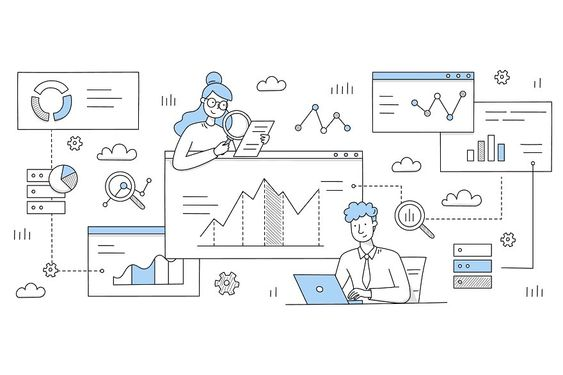

In [106]:
# Create a dictionary containing the model performance metrics
data = {
    "Model":['SVD','Normal Predictor','Baseline Only','NMF','Slope One'],
    "Fit Time": [fit_time_svd, fit_time_np, fit_time_blo, fit_time_nmf, fit_time_slo],
    "Test Time": [test_time_svd, test_time_np, test_time_blo, test_time_nmf, test_time_slo],
    "Test RMSE": [svd_rmse, np_rmse, blo_rmse, nmf_rmse, slo_rmse]
}

In [107]:
# Generate dataframe from the dictionary
df = pd.DataFrame.from_dict(data)

In [108]:
df.head()

Model    Fit Time  Test Time  Test RMSE
0               SVD  258.637585  17.446802   0.869963
1  Normal Predictor    5.888721  13.675982   1.363632
2     Baseline Only   42.846119  10.954610   0.868857
3               NMF  314.990828  10.329205   0.938152
4         Slope One    8.148839  21.480458   0.881156

[Text(0, 0, 'SVD'),
 Text(1, 0, 'Normal Predictor'),
 Text(2, 0, 'Baseline Only'),
 Text(3, 0, 'NFM'),
 Text(4, 0, 'Slope One')]

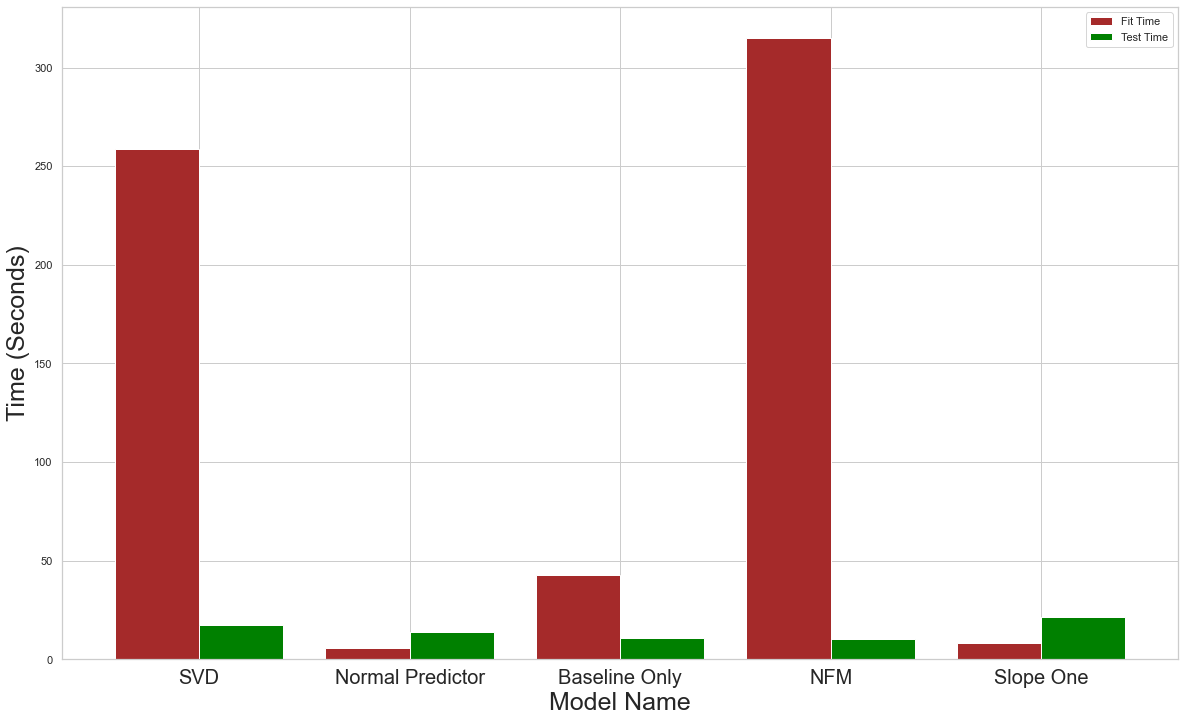

In [109]:
# Plot the Fit and Test time performance metrics for the different Models
df[['Fit Time','Test Time']].plot( kind='bar', width = 0.8,figsize=(20,12), color = ['brown','green','orange'] )
plt.xlabel('Model Name', fontsize = 25)
plt.ylabel('Time (Seconds)', fontsize = 25)
plt.xticks(rotation=0, fontsize = 20)

# Setting the xtics values manually 
ax = plt.gca() # grab the current axis
ax.set_xticks([0,1,2,3,4]) # choose which x locations to have ticks
ax.set_xticklabels(['SVD','Normal Predictor','Baseline Only', 'NMF', 'Slope One']) # set the labels to display at those ticks

[Text(0, 0, 'SVD'),
 Text(1, 0, 'Normal Predictor'),
 Text(2, 0, 'Baseline Only'),
 Text(3, 0, 'NFM'),
 Text(4, 0, 'Slope One')]

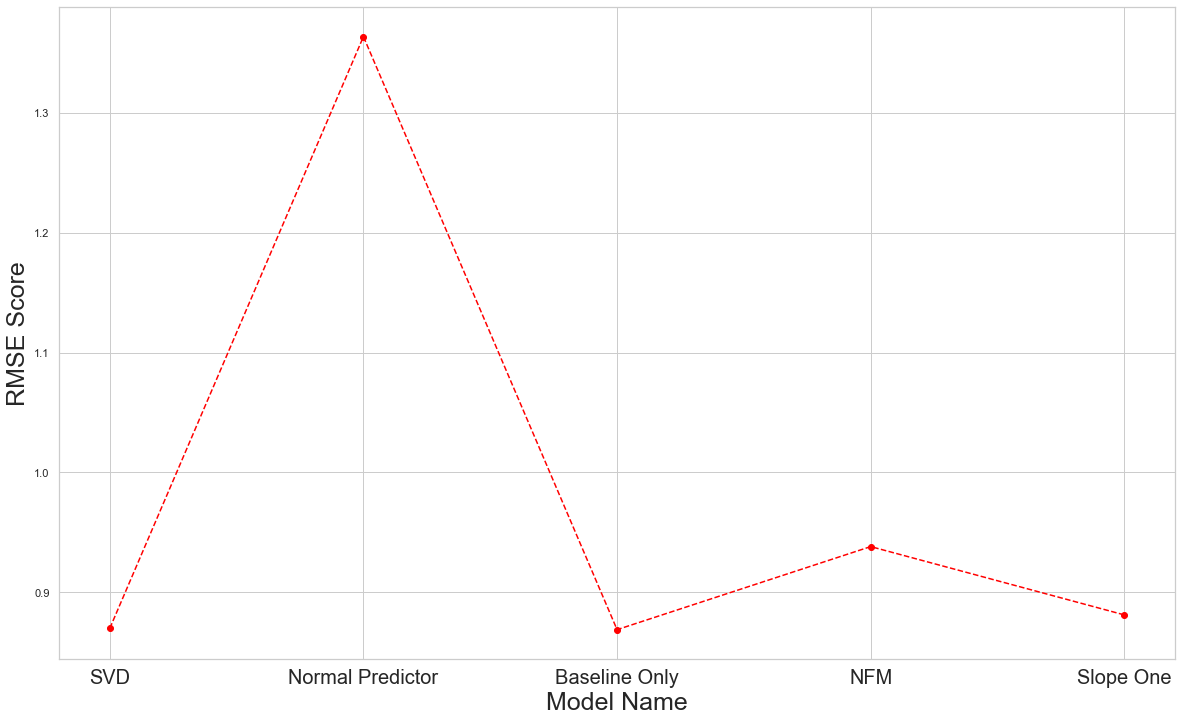

In [110]:
# Plotting the RMSE performance metrics for the various Models
df['Test RMSE'].plot(kind = 'line', figsize=(20,12), color='red', linestyle='--', marker='o')
plt.xlabel('Model Name', fontsize = 25)
plt.ylabel('RMSE Score', fontsize = 25)
plt.xticks(rotation=0, fontsize = 20)

# Setting the xticks values manually
ax = plt.gca() # grab the current axis
ax.set_xticks([0,1,2,3,4]) # choose which x locations to have ticks
ax.set_xticklabels(['SVD','Normal Predictor','Baseline Only', 'NMF', 'Slope One']) # set the labels to display at those ticks



<a id="ten"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> KAGGLE SUBMISSION
</h1></left>
<a href=#cont>Back to Table of Contents</a>

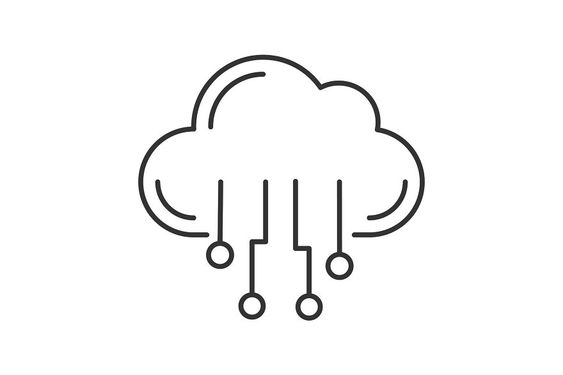

In [ ]:
'''
This function generates a submisison file to the
notebook directory after entering the model variable name,
test dataset name and submission file name
'''

def generate_submission_file(model, test_file, sub_file):
    # Generating copy of test file
    test = test_file.copy
    
    # Creating rating column and initializing all values to zero
    test.loc[:, 'rating'] = 0
    
    # Loading the test file to the surprise library dataset list
    test_processed = Dataset.load_from_df(test[['userId','movieId','rating']], reader)
    
    # Performing a test train split on the test dataset
    NA, test_= train_test_split(test_processed, test_size=1.0, shuffle = False, random_state = 42)
    
    # Generating predictions for the test dataset using the model 
    predictions = model.test(test_)
    
    # Transforming the ratings predictions from a series object to a list object
    ratings = [i.est for i in predictions]
    
    # Combining the UserId and movieId values into a single column
    test['Id'] = test['userId'].astype(str) + '_'+ test['movieId'].astype(str)
    
    # Assigining prediction values to the ratings column in the test dataset
    test['rating'] = ratings
    del test['userId']
    del test['movieId']
    
    # Formatting the submission dataset into the correct column order
    test['R'] = test['rating']
    del test['rating']
    
    test['rating'] = test['R']
    del test['R']
    
    # Writing the submission file onto the directory
    submission = test.to_csv( str(sub_file) +'.csv', index = False)
    return submission

<a id="eleven"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> LOGGING COMMET EXPERIMENT
</h1></left>
<a href=#cont>Back to Table of Contents</a>

In [ ]:
# Create dictionaries for the data we want to log          
metrics = {
    "Index":['SVD','Normal Predictor','Baseline Only','NMF','Slope One'],
    "Fit Time": [fit_time_svd, fit_time_np, fit_time_blo, fit_time_nmf, fit_time_slo],
    "Test Time": [test_time_svd, test_time_np, test_time_blo, test_time_nmf, test_time_slo],
    "Test RMSE": [svd_rmse, np_rmse, blo_rmse, nmf_rmse, slo_rmse]
}

params= {'model': 'Base Line Only',
         'method': 2,
         'n_epochs': 50,
         }

# Log info on comet
experiment.log_metrics(metrics)
experiment.log_parameters(params)

# End experiment
experiment.end()

# Display results on comet page
experiment.display()


<a id="twelve"></a>
</h1></left><left><h1 style="font-size:200%; font-family:cursive; background:orange; color:black; border-radius:10px 10px; padding:10px;"> REFFERENCES
</h1></left>
<a href=#cont>Back to Table of Contents</a>

Kindly find below the refference links for source of information on the models used images used:

1. https://towardsdatascience.com/recommender-system-singular-value-decomposition-svd-truncated-svd-97096338f361

2. https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability8.html

3. https://iq.opengenus.org/topic-modeling-nmf/

4. https://en.wikipedia.org/wiki/Slope_One

5. https://deepchecks.com/glossary/knn-models/

6. https://github.com/NicolasHug/Surprise/blob/master/surprise/prediction_algorithms/baseline_only.py

7. https://www.pinterest.com/search/pins/?q=data%20analytics&rs=typed&term_meta[]=data%7Ctyped&term_meta[]=analytics%7Ctyped